In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('WHO-COVID-19-global-daily-data.csv')

In [38]:
print(data.head())

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457440 entries, 0 to 457439
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      457440 non-null  object 
 1   Country_code       455534 non-null  object 
 2   Country            457440 non-null  object 
 3   WHO_region         457440 non-null  object 
 4   New_cases          208223 non-null  float64
 5   Cumulative_cases   457440 non-null  int64  
 6   New_deaths         153022 non-null  float64
 7   Cumulative_deaths  457440 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 27.9+ MB
None


In [40]:
print(data.describe())

          New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  2.082230e+05      4.574400e+05  153022.000000       4.574400e+05
mean   3.734864e+03      1.961042e+06      46.350982       2.112438e+04
std    4.880802e+04      8.290151e+06     243.065038       8.517506e+04
min   -6.507900e+04      0.000000e+00   -3520.000000       0.000000e+00
25%    3.000000e+00      5.850750e+03       0.000000       3.600000e+01
50%    6.200000e+01      5.422100e+04       2.000000       6.710000e+02
75%    6.900000e+02      6.289430e+05      15.000000       7.574000e+03
max    6.966046e+06      1.034368e+08   44047.000000       1.220951e+06


In [41]:
data.rename(columns={'Date_reported': 'Date'}, inplace=True)

In [42]:
data['Date'] = pd.to_datetime(data['Date'])

In [43]:
print(data.head())
print(data.info())

        Date Country_code     Country WHO_region  New_cases  Cumulative_cases  \
0 2020-01-04           AI    Anguilla        AMR        NaN                 0   
1 2020-01-04           AZ  Azerbaijan        EUR        NaN                 0   
2 2020-01-04           BD  Bangladesh       SEAR        0.0                 0   
3 2020-01-04           BB    Barbados        AMR        NaN                 0   
4 2020-01-04           BR      Brazil        AMR        NaN                 0   

   New_deaths  Cumulative_deaths  
0         NaN                  0  
1         NaN                  0  
2         0.0                  0  
3         NaN                  0  
4         NaN                  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457440 entries, 0 to 457439
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               457440 non-null  datetime64[ns]
 1   Country_code       4

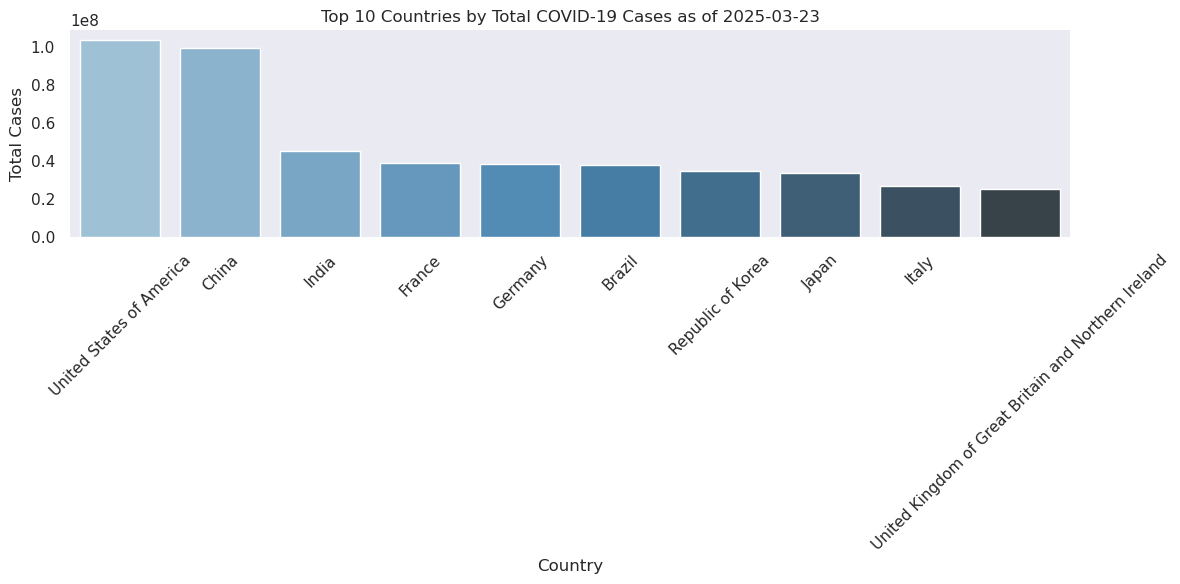

In [44]:

latest_date = data['Date'].max()
latest = data[data['Date'] == latest_date]

# Top 10 countries by cumulative cases
top10_cases = latest.sort_values(by='Cumulative_cases', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=top10_cases, x='Country', y='Cumulative_cases', palette='Blues_d')
plt.title(f'Top 10 Countries by Total COVID-19 Cases as of {latest_date.date()}')
plt.xticks(rotation=45)
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()


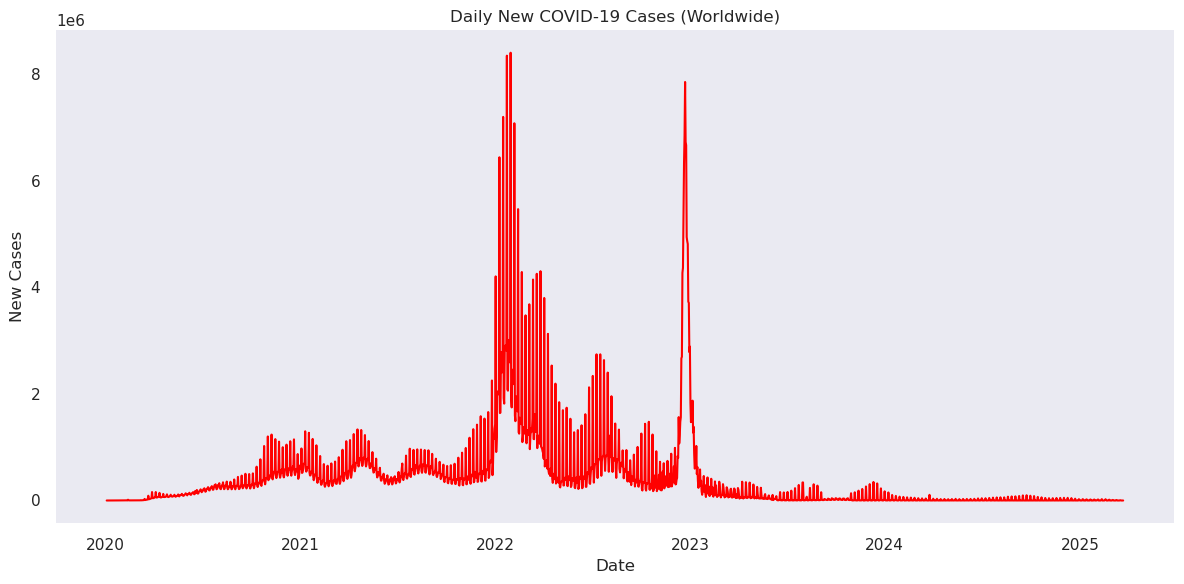

In [45]:
# Group by Date
daily_cases = data.groupby('Date')['New_cases'].sum().reset_index()

# Line plot
plt.figure(figsize=(12,6))
plt.plot(daily_cases['Date'], daily_cases['New_cases'], color='red')
plt.title('Daily New COVID-19 Cases (Worldwide)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.tight_layout()
plt.show()


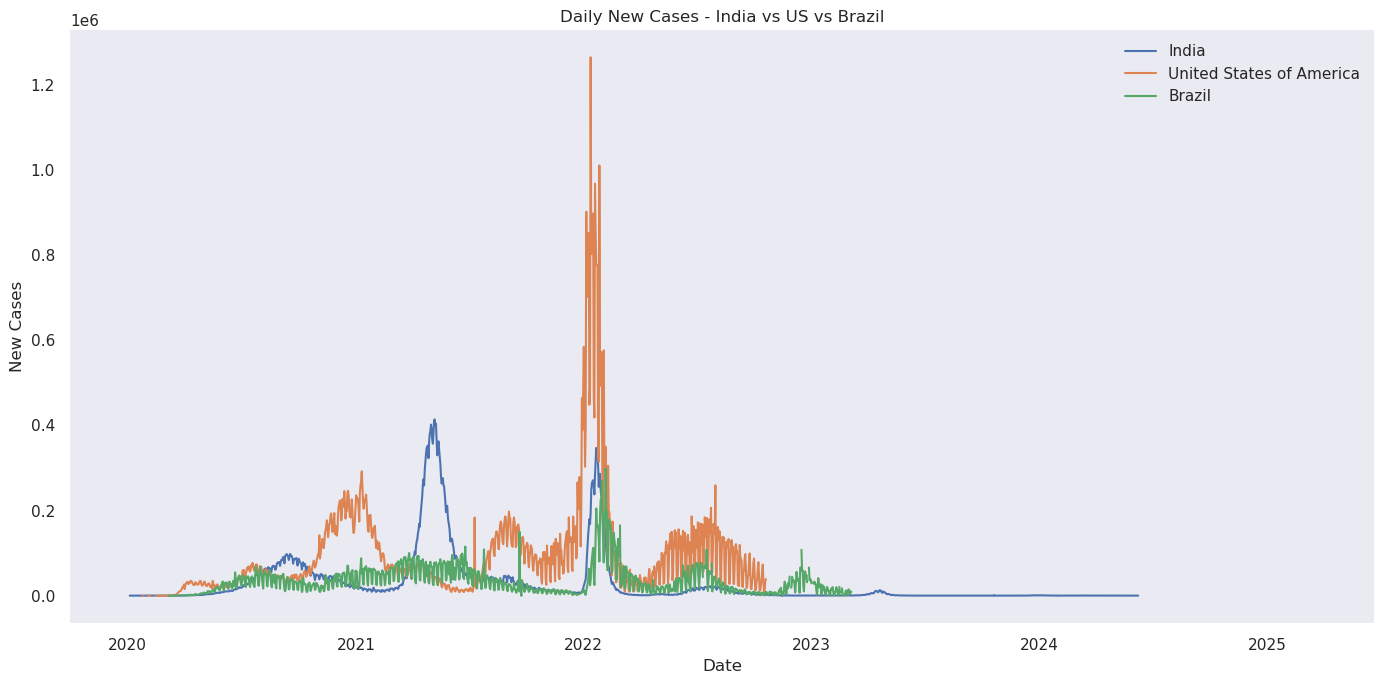

In [46]:
countries = ['India', 'United States of America', 'Brazil']

plt.figure(figsize=(14,7))
for country in countries:
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Date'], country_data['New_cases'], label=country)

plt.title('Daily New Cases - India vs US vs Brazil')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


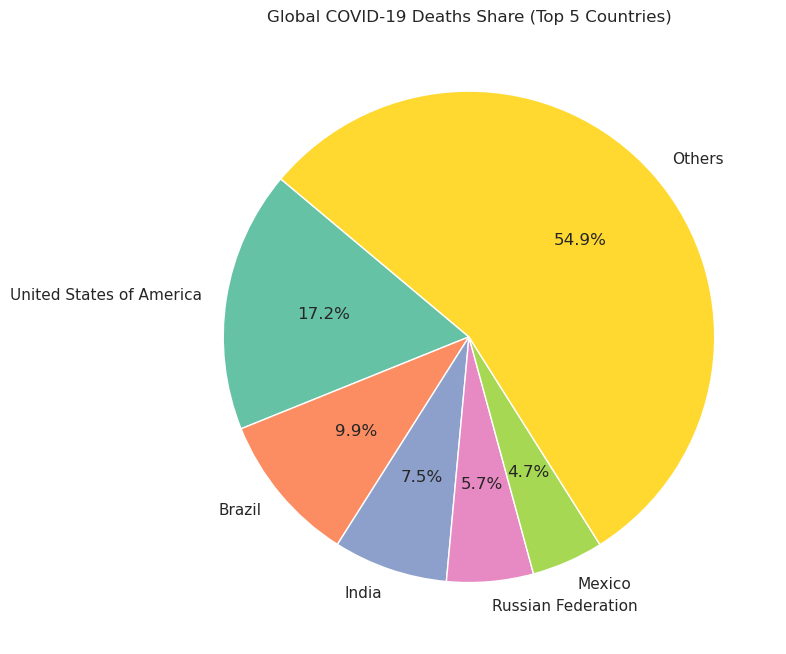

In [47]:
top5_deaths = latest.sort_values(by='Cumulative_deaths', ascending=False).head(5)
others_deaths = latest['Cumulative_deaths'].sum() - top5_deaths['Cumulative_deaths'].sum()

labels = list(top5_deaths['Country']) + ['Others']
sizes = list(top5_deaths['Cumulative_deaths']) + [others_deaths]

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Global COVID-19 Deaths Share (Top 5 Countries)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_457/3953520949.py:17: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


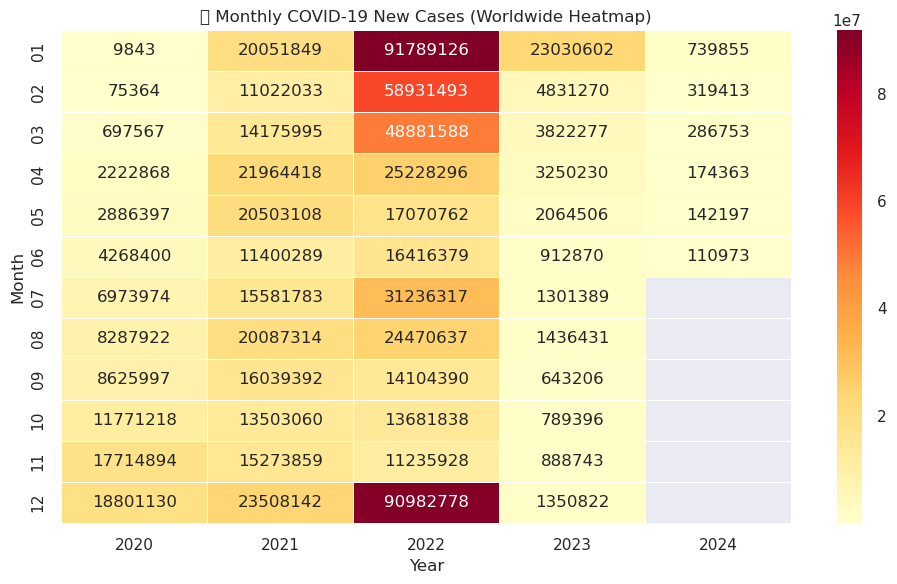

In [32]:
# Month-Year column banao
data['Month_Year'] = data['Date'].dt.to_period('M')

# Monthly global cases
monthly_cases = data.groupby('Month_Year')['New_cases'].sum().reset_index()
monthly_cases['Month_Year'] = monthly_cases['Month_Year'].astype(str)
monthly_cases['Year'] = monthly_cases['Month_Year'].str[:4]
monthly_cases['Month'] = monthly_cases['Month_Year'].str[5:]

# ✅ Corrected Pivot for heatmap
heatmap_data = monthly_cases.pivot(index="Month", columns="Year", values="New_cases")

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".0f")
plt.title("🌡️ Monthly COVID-19 New Cases (Worldwide Heatmap)")
plt.tight_layout()
plt.show()


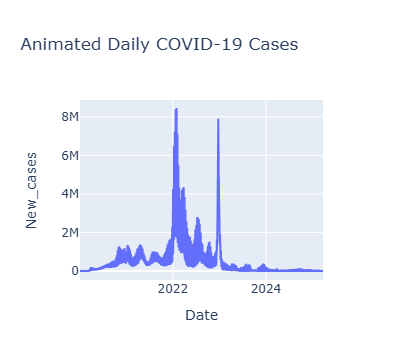

In [48]:
import plotly.express as px

# Use daily_cases created earlier
fig = px.line(daily_cases, x='Date', y='New_cases', title='Animated Daily COVID-19 Cases')
fig.show()


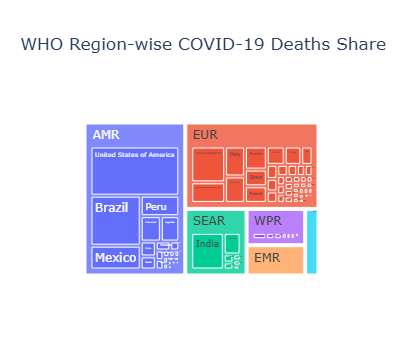

In [49]:
import plotly.express as px

latest_date = data['Date'].max()
latest = data[data['Date'] == latest_date]

fig = px.treemap(latest, 
                 path=['WHO_region', 'Country'], 
                 values='Cumulative_deaths', 
                 title='WHO Region-wise COVID-19 Deaths Share')
fig.show()


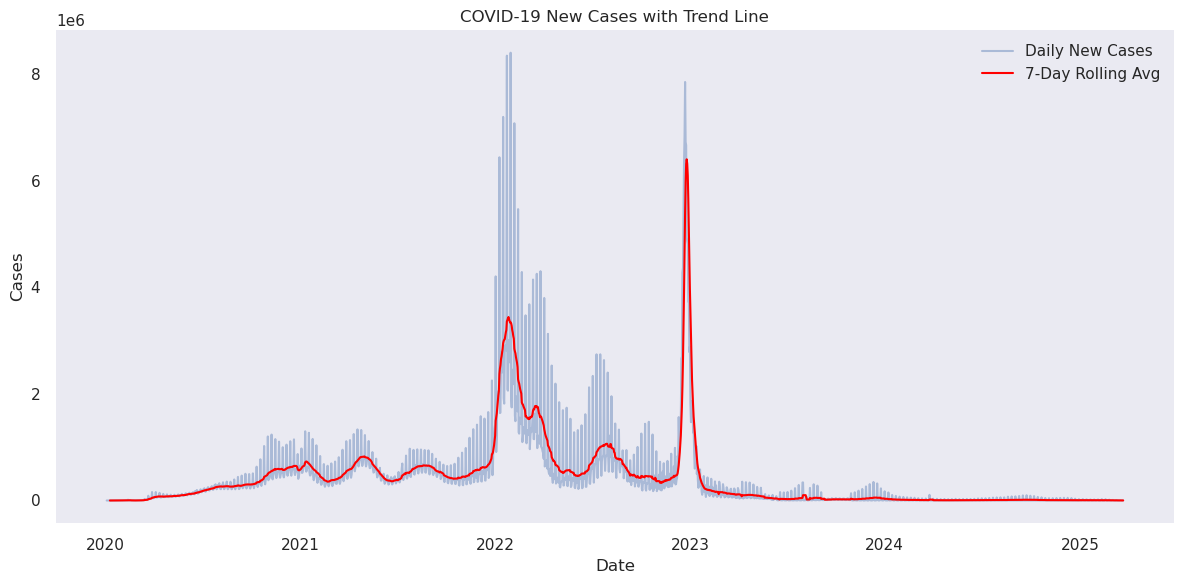

In [50]:
# Rolling average (7-day)
daily_cases['7_day_avg'] = daily_cases['New_cases'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(daily_cases['Date'], daily_cases['New_cases'], alpha=0.4, label='Daily New Cases')
plt.plot(daily_cases['Date'], daily_cases['7_day_avg'], color='red', label='7-Day Rolling Avg')
plt.title('COVID-19 New Cases with Trend Line')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.tight_layout()
plt.show()
